In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

from IPython.display import clear_output
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import numpy as np
import time
import scipy.io

In [2]:
data = scipy.io.loadmat('regressionsine.mat')
x1 = data.get('x')
#x = np.concatenate(x, axis)
x = torch.from_numpy(x1)
x = torch.tensor(x,dtype=torch.float)
y = data.get('y')
#y = np.concatenate( y, axis=0 )
y = torch.from_numpy(y)
y = torch.tensor(y,dtype=torch.float)

In [3]:
# this is one way to define a network
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_hidden1, n_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden, bias=True)    # hidden layer0
        self.hidden1 = nn.Linear(n_hidden, n_hidden1, bias=True)   # hidden layer1
        self.predict = nn.Linear(n_hidden1, n_output, bias=True)   # output layer

    def forward(self, x):
        x = F.softmax(self.hidden(x))      # softmax activation function for hidden layer0
        x = F.relu(self.hidden1(x))        # relu activation function for hidden layer1
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=2, n_hidden=50, n_hidden1=50, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss_func = nn.MSELoss()  # this is for regression mean squared loss


Net(
  (hidden): Linear(in_features=2, out_features=50, bias=True)
  (hidden1): Linear(in_features=50, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=1, bias=True)
)


In [4]:
def plot(t,x,y,predict,losses,dt):
    clear_output(True)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title('iteration %s'% (t))
    plt.plot(times.data.numpy(),y.data.numpy()[0:500], color = "orange")
    
    plt.text(0, -2.5, 'scan time = %.4f' % dt, fontdict={'size': 12, 'color':  'red'})
    plt.text(0, -2.1, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 12, 'color':  'red'})
    
    plt.plot(times.data.numpy(),predict.data.numpy()[0:500], color = "green")
    
    plt.subplot(122)
    plt.title('Loss')
    plt.plot(losses)
    
    plt.show()

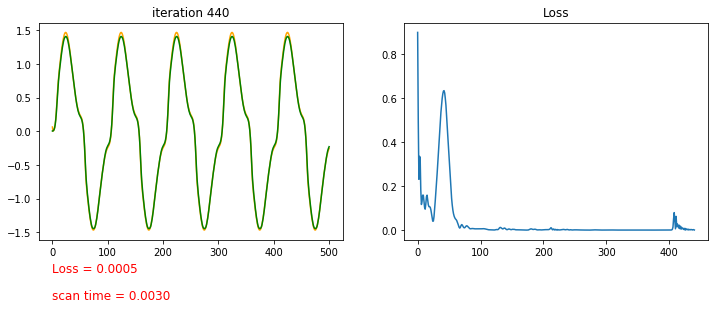

In [5]:
predictiond=[]
losses=[]
N = 35      # window size


times = torch.unsqueeze(torch.linspace(0, 500,500), dim=1)
for t in range(450):
    start = time.time()  
    
    prediction = net(x[0:500])     # input x and predict based on x

    loss = loss_func(prediction[t:t+N], y[t:t+N])     # must be (1. nn output, 2. target)
    losses.append(loss.data.numpy())
    
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    duration = time.time()-start
    predictiond.append(prediction.data.numpy())
    
    # plot and show learning process
    if t % 20==0:
        plot(t,x,y,prediction,losses,duration)
        #print(net.predict.weight)
        #print(np.mean(losses),np.std(losses))
    

C:\Users\Abdul Hady\Miniconda3\envs\deeplearn_course\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


tensor(0.0008, grad_fn=<MseLossBackward>)


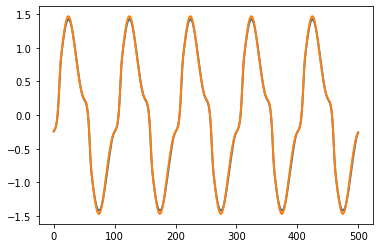

In [6]:
y_test = net(x[500:1000])
plt.plot(times.data.numpy(), y_test.data.numpy(), times.data.numpy(), y.data.numpy()[500:1000], lw=2)
loss = loss_func(y_test, y[500:1000])
print(loss)